In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#Loading Dataset
data=pd.read_csv('data.csv')
data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [3]:
data.drop("Id",axis=1,inplace=True) #dropping Id column

In [4]:
data.head(pd.set_option("display.max_columns",None)) #display maximum columns

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1456          20       RL         85.0    13175   Pave   NaN      Reg   
1457          70       RL         66.0     9042   Pave   NaN      Reg   
1458          20       RL         68.0     9717   Pave   NaN      Reg   
1459          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   
4          350.0        Gd        TA      PConc       Gd       TA   


In [5]:
data.head(pd.set_option("display.max_rows",None)) #display maximum rows

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
5             50       RL         85.0    14115   Pave   NaN      IR1   
6             20       RL         75.0    10084   Pave   NaN      Reg   
7             60       RL          NaN    10382   Pave   NaN      IR1   
8             50       RM         51.0     6120   Pave   NaN      Reg   
9            190       RL         50.0     7420   Pave   NaN      Reg   
10            20       RL         70.0    11200   Pave   NaN      Reg   
11            60       RL         85.0    11924   Pave   NaN      IR1   
12            20       RL          NaN    12968   Pave   NaN      IR2   
13            20       RL         91.0    10652   Pave   NaN      IR1   
14            20       RL          NaN    10920   Pave   NaN      IR1   
15            45       RM         51.0     6120   Pave   NaN      Reg   
16            20       RL          NaN    11241   Pave   NaN      IR1   
17            90       RL         72.0    10791   Pave   NaN      Reg   
18            20       RL         66.0    13695   Pave   NaN      Reg   
19            20       RL         70.0     7560   Pave   NaN      Reg   
20            60       RL        101.0    14215   Pave   NaN      IR1   
21            45       RM         57.0     7449   Pave  Grvl      Reg   
22            20       RL         75.0     9742   Pave   NaN      Reg   
23           120       RM         44.0     4224   Pave   NaN      Reg   
24            20       RL          NaN     8246   Pave   NaN      IR1   
25            20       RL        110.0    14230   Pave   NaN      Reg   
26            20       RL         60.0     7200   Pave   NaN      Reg   
27            20       RL         98.0    11478   Pave   NaN      Reg   
28            20       RL         47.0    16321   Pave   NaN      IR1   
29            30       RM         60.0     6324   Pave   NaN      IR1   
30            70  C (all)         50.0     8500   Pave  Pave      Reg   
31            20       RL          NaN     8544   Pave   NaN      IR1   
32            20       RL         85.0    11049   Pave   NaN      Reg   
33            20       RL         70.0    10552   Pave   NaN      IR1   
34           120       RL         60.0     7313   Pave   NaN      Reg   
35            60       RL        108.0    13418   Pave   NaN      Reg   
36            20       RL        112.0    10859   Pave   NaN      Reg   
37            20       RL         74.0     8532   Pave   NaN      Reg   
38            20       RL         68.0     7922   Pave   NaN      Reg   
39            90       RL         65.0     6040   Pave   NaN      Reg   
40            20       RL         84.0     8658   Pave   NaN      Reg   
41            20       RL        115.0    16905   Pave   NaN      Reg   
42            85       RL          NaN     9180   Pave   NaN      IR1   
43            20       RL          NaN     9200   Pave   NaN      IR1   
44            20       RL         70.0     7945   Pave   NaN      Reg   
45           120       RL         61.0     7658   Pave   NaN      Reg   
46            50       RL         48.0    12822   Pave   NaN      IR1   
47            20       FV         84.0    11096   Pave   NaN      Reg   
48           190       RM         33.0     4456   Pave   NaN      Reg   
49            20       RL         66.0     7742   Pave   NaN      Reg   
50            60       RL          NaN    13869   Pave   NaN      IR2   
51            50       RM         52.0     6240   Pave   NaN      Reg   
52            90       RM        110.0     8472   Grvl   NaN      IR2   
53            20       RL         68.0    50271   Pave   NaN    

# Basic Checks

In [6]:
data.tail()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1456          20       RL         85.0    13175   Pave   NaN      Reg   
1457          70       RL         66.0     9042   Pave   NaN      Reg   
1458          20       RL         68.0     9717   Pave   NaN      Reg   
1459          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1455         0.0        TA        TA      PConc       Gd       TA   
1456       119.0        TA        TA     CBlock       Gd       TA   
1457         0.0        Ex        Gd      Stone       TA       Gd   
1458         0.0        TA        TA     CBlock       TA       TA   
1459         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1455           No          Unf           0          Unf           0   
1456           No          ALQ         790          Rec         163   
1457           No          GLQ         275          Unf           0   
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1455        953          953    GasA        Ex          Y      SBrkr   
1456        589         1542    GasA        TA          Y      SBrkr   
1457        877         1152    GasA        Ex          Y      SBrkr   
1458          0         1078    GasA        Gd          Y      FuseA   
1459        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1455       953       694             0       1647             0             0   
1456      2073         0             0       2073             1             0   
1457      1188      1152             0       2340             0             0   
1458      1078         0             0       1078             1             0   
1459      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1455         2         1             3             1          TA   
1456         2         0             3             1          TA   
1457         2         0             4             1          Gd   
1458         1         0             2             1          Gd   
1459         1         1             3             1          TA   

      TotRmsAbvGrd Functional  Firepl

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [8]:
data.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000   
mean       2.866438      1.046575      6.517808     0.613014  1978.506164   
std        0.815778      0.220338      1.625393     0.644666    24.689725   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1961.000000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000   

In [9]:
data.shape

(1460, 80)

# Checking Null values

In [10]:
data.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

<AxesSubplot:>

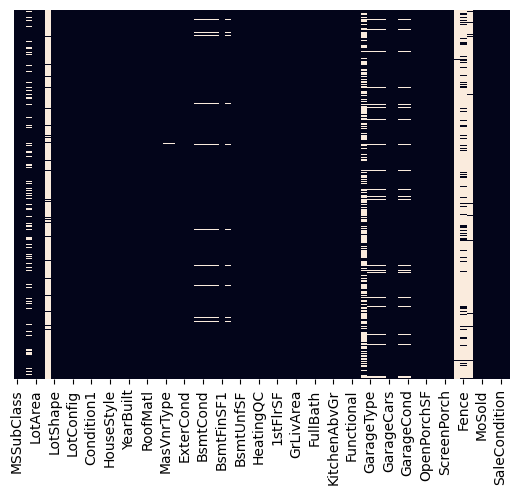

In [11]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

# Fillng the missing values

In [12]:
data.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [13]:
data.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [14]:
data.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
63.0      17
79.0      17
72.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
43.0      12
40.0      12
57.0      12
76.0      11
69.0      11
92.0      10
34.0      10
53.0      10
86.0      10
88.0      10
84.0       9
35.0       9
62.0       9
44.0       9
77.0       9
93.0       8
98.0       8
96.0       8
61.0       8
95.0       7
58.0       7
120.0      7
107.0      7
94.0       6
81.0       6
36.0       6
30.0       6
48.0       6
91.0       6
41.0       6
54.0       6
89.0       6
110.0      6
105.0      6
32.0       5
47.0       5
87.0       5
56.0       5
37.0       5
83.0       5
102.0      4
42.0       4
49.0       4
104.0      3
103.0      3
99.0       3
45.0       3
108.0      3
130.0      3
124.0      2

In [15]:
data['LotFrontage']=data['LotFrontage'].fillna(data['LotFrontage'].median())
data['BsmtCond']=data['BsmtCond'].fillna(data['BsmtCond'].mode()[0])
data['BsmtQual']=data['BsmtQual'].fillna(data['BsmtQual'].mode()[0])

In [16]:
data.GarageType.unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [17]:
data['FireplaceQu']=data['FireplaceQu'].fillna(data['FireplaceQu'].mode()[0])
data['GarageType']=data['GarageType'].fillna(data['GarageType'].mode()[0])
data.drop(['GarageYrBlt'],axis=1,inplace=True)

In [18]:
data.drop(['Alley'],axis=1,inplace=True)

In [19]:
data['GarageFinish']=data['GarageFinish'].fillna(data['GarageFinish'].mode()[0])
data['GarageCond']=data['GarageCond'].fillna(data['GarageCond'].mode()[0])

In [20]:
data['GarageQual']=data['GarageQual'].fillna(data['GarageQual'].mode()[0])

In [21]:
data.drop(['MiscFeature'],axis=1,inplace=True)

In [22]:
data.drop(['PoolQC'],axis=1,inplace=True)

In [23]:
data.drop(["Fence"],axis=1,inplace=True)

In [24]:
data.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [25]:
data['MasVnrType']=data['MasVnrType'].fillna(data['MasVnrType'].mode()[0])
data['MasVnrArea']=data['MasVnrType'].fillna(data['MasVnrArea'].mode()[0])

<AxesSubplot:>

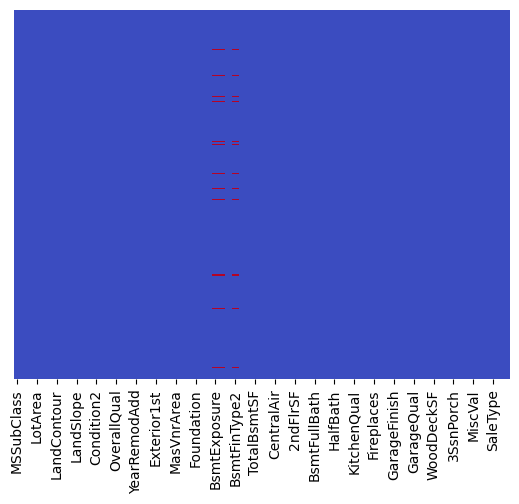

In [26]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [27]:
data['BsmtFinType2']=data['BsmtFinType2'].fillna(data['BsmtFinType2'].mode()[0])

In [28]:
data.dropna(inplace=True)

In [29]:
data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

# Handling Categorical Columns

In [30]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition2','BldgType',
        'Condition1','HouseStyle','SaleType','SaleCondition','ExterCond','ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure',
        'BsmtFinType1','BsmtFinType2','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
        'CentralAir','Electrical','KitchenQual',
        'Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
scaler=LabelEncoder()

In [33]:
data['MSZoning']=scaler.fit_transform(data.MSZoning)
data['Street']=scaler.fit_transform(data.Street)
data['LotShape']=scaler.fit_transform(data.LotShape)
data['LandContour']=scaler.fit_transform(data.LandContour)
data['Utilities']=scaler.fit_transform(data.Utilities)
data['LotConfig']=scaler.fit_transform(data.LotConfig)
data['LandSlope']=scaler.fit_transform(data.LandSlope)
data['Neighborhood']=scaler.fit_transform(data.Neighborhood)
data['Condition2']=scaler.fit_transform(data.Condition2)
data['BldgType']=scaler.fit_transform(data.BldgType)

In [34]:
data['Condition1']=scaler.fit_transform(data.Condition1)
data['HouseStyle']=scaler.fit_transform(data.HouseStyle)
data['SaleType']=scaler.fit_transform(data.SaleType)
data['SaleCondition']=scaler.fit_transform(data.SaleCondition)
data['ExterCond']=scaler.fit_transform(data.ExterCond)
data['ExterQual']=scaler.fit_transform(data.ExterQual)
data['Foundation']=scaler.fit_transform(data.Foundation)
data['BsmtQual']=scaler.fit_transform(data.BsmtQual)
data['BsmtCond']=scaler.fit_transform(data.BsmtCond)
data['BsmtExposure']=scaler.fit_transform(data.BsmtExposure)

In [35]:
columns

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition2',
 'BldgType',
 'Condition1',
 'HouseStyle',
 'SaleType',
 'SaleCondition',
 'ExterCond',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive']

In [36]:
data['BsmtFinType1']=scaler.fit_transform(data.BsmtFinType1)
data['BsmtFinType2']=scaler.fit_transform(data.BsmtFinType2)
data['RoofStyle']=scaler.fit_transform(data.RoofStyle)
data['RoofMatl']=scaler.fit_transform(data.RoofMatl)
data['Exterior1st']=scaler.fit_transform(data.Exterior1st)
data['Exterior2nd']=scaler.fit_transform(data.Exterior2nd)
data['MasVnrType']=scaler.fit_transform(data.MasVnrType)
data['Heating']=scaler.fit_transform(data.Heating)
data['HeatingQC']=scaler.fit_transform(data.HeatingQC)
data['CentralAir']=scaler.fit_transform(data.CentralAir)
data['Electrical']=scaler.fit_transform(data.Electrical)
data['KitchenQual']=scaler.fit_transform(data.KitchenQual)


In [37]:
data['Functional']=scaler.fit_transform(data.Functional)
data['FireplaceQu']=scaler.fit_transform(data.FireplaceQu)
data['GarageType']=scaler.fit_transform(data.GarageType)
data['GarageFinish']=scaler.fit_transform(data.GarageFinish)
data['GarageQual']=scaler.fit_transform(data.GarageQual)
data['GarageCond']=scaler.fit_transform(data.GarageCond)
data['PavedDrive']=scaler.fit_transform(data.PavedDrive)
data['MasVnrArea']=scaler.fit_transform(data.MasVnrArea)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1421 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1421 non-null   int64  
 1   MSZoning       1421 non-null   int32  
 2   LotFrontage    1421 non-null   float64
 3   LotArea        1421 non-null   int64  
 4   Street         1421 non-null   int32  
 5   LotShape       1421 non-null   int32  
 6   LandContour    1421 non-null   int32  
 7   Utilities      1421 non-null   int32  
 8   LotConfig      1421 non-null   int32  
 9   LandSlope      1421 non-null   int32  
 10  Neighborhood   1421 non-null   int32  
 11  Condition1     1421 non-null   int32  
 12  Condition2     1421 non-null   int32  
 13  BldgType       1421 non-null   int32  
 14  HouseStyle     1421 non-null   int32  
 15  OverallQual    1421 non-null   int64  
 16  OverallCond    1421 non-null   int64  
 17  YearBuilt      1421 non-null   int64  
 18  YearRemo

# Handling Outliers

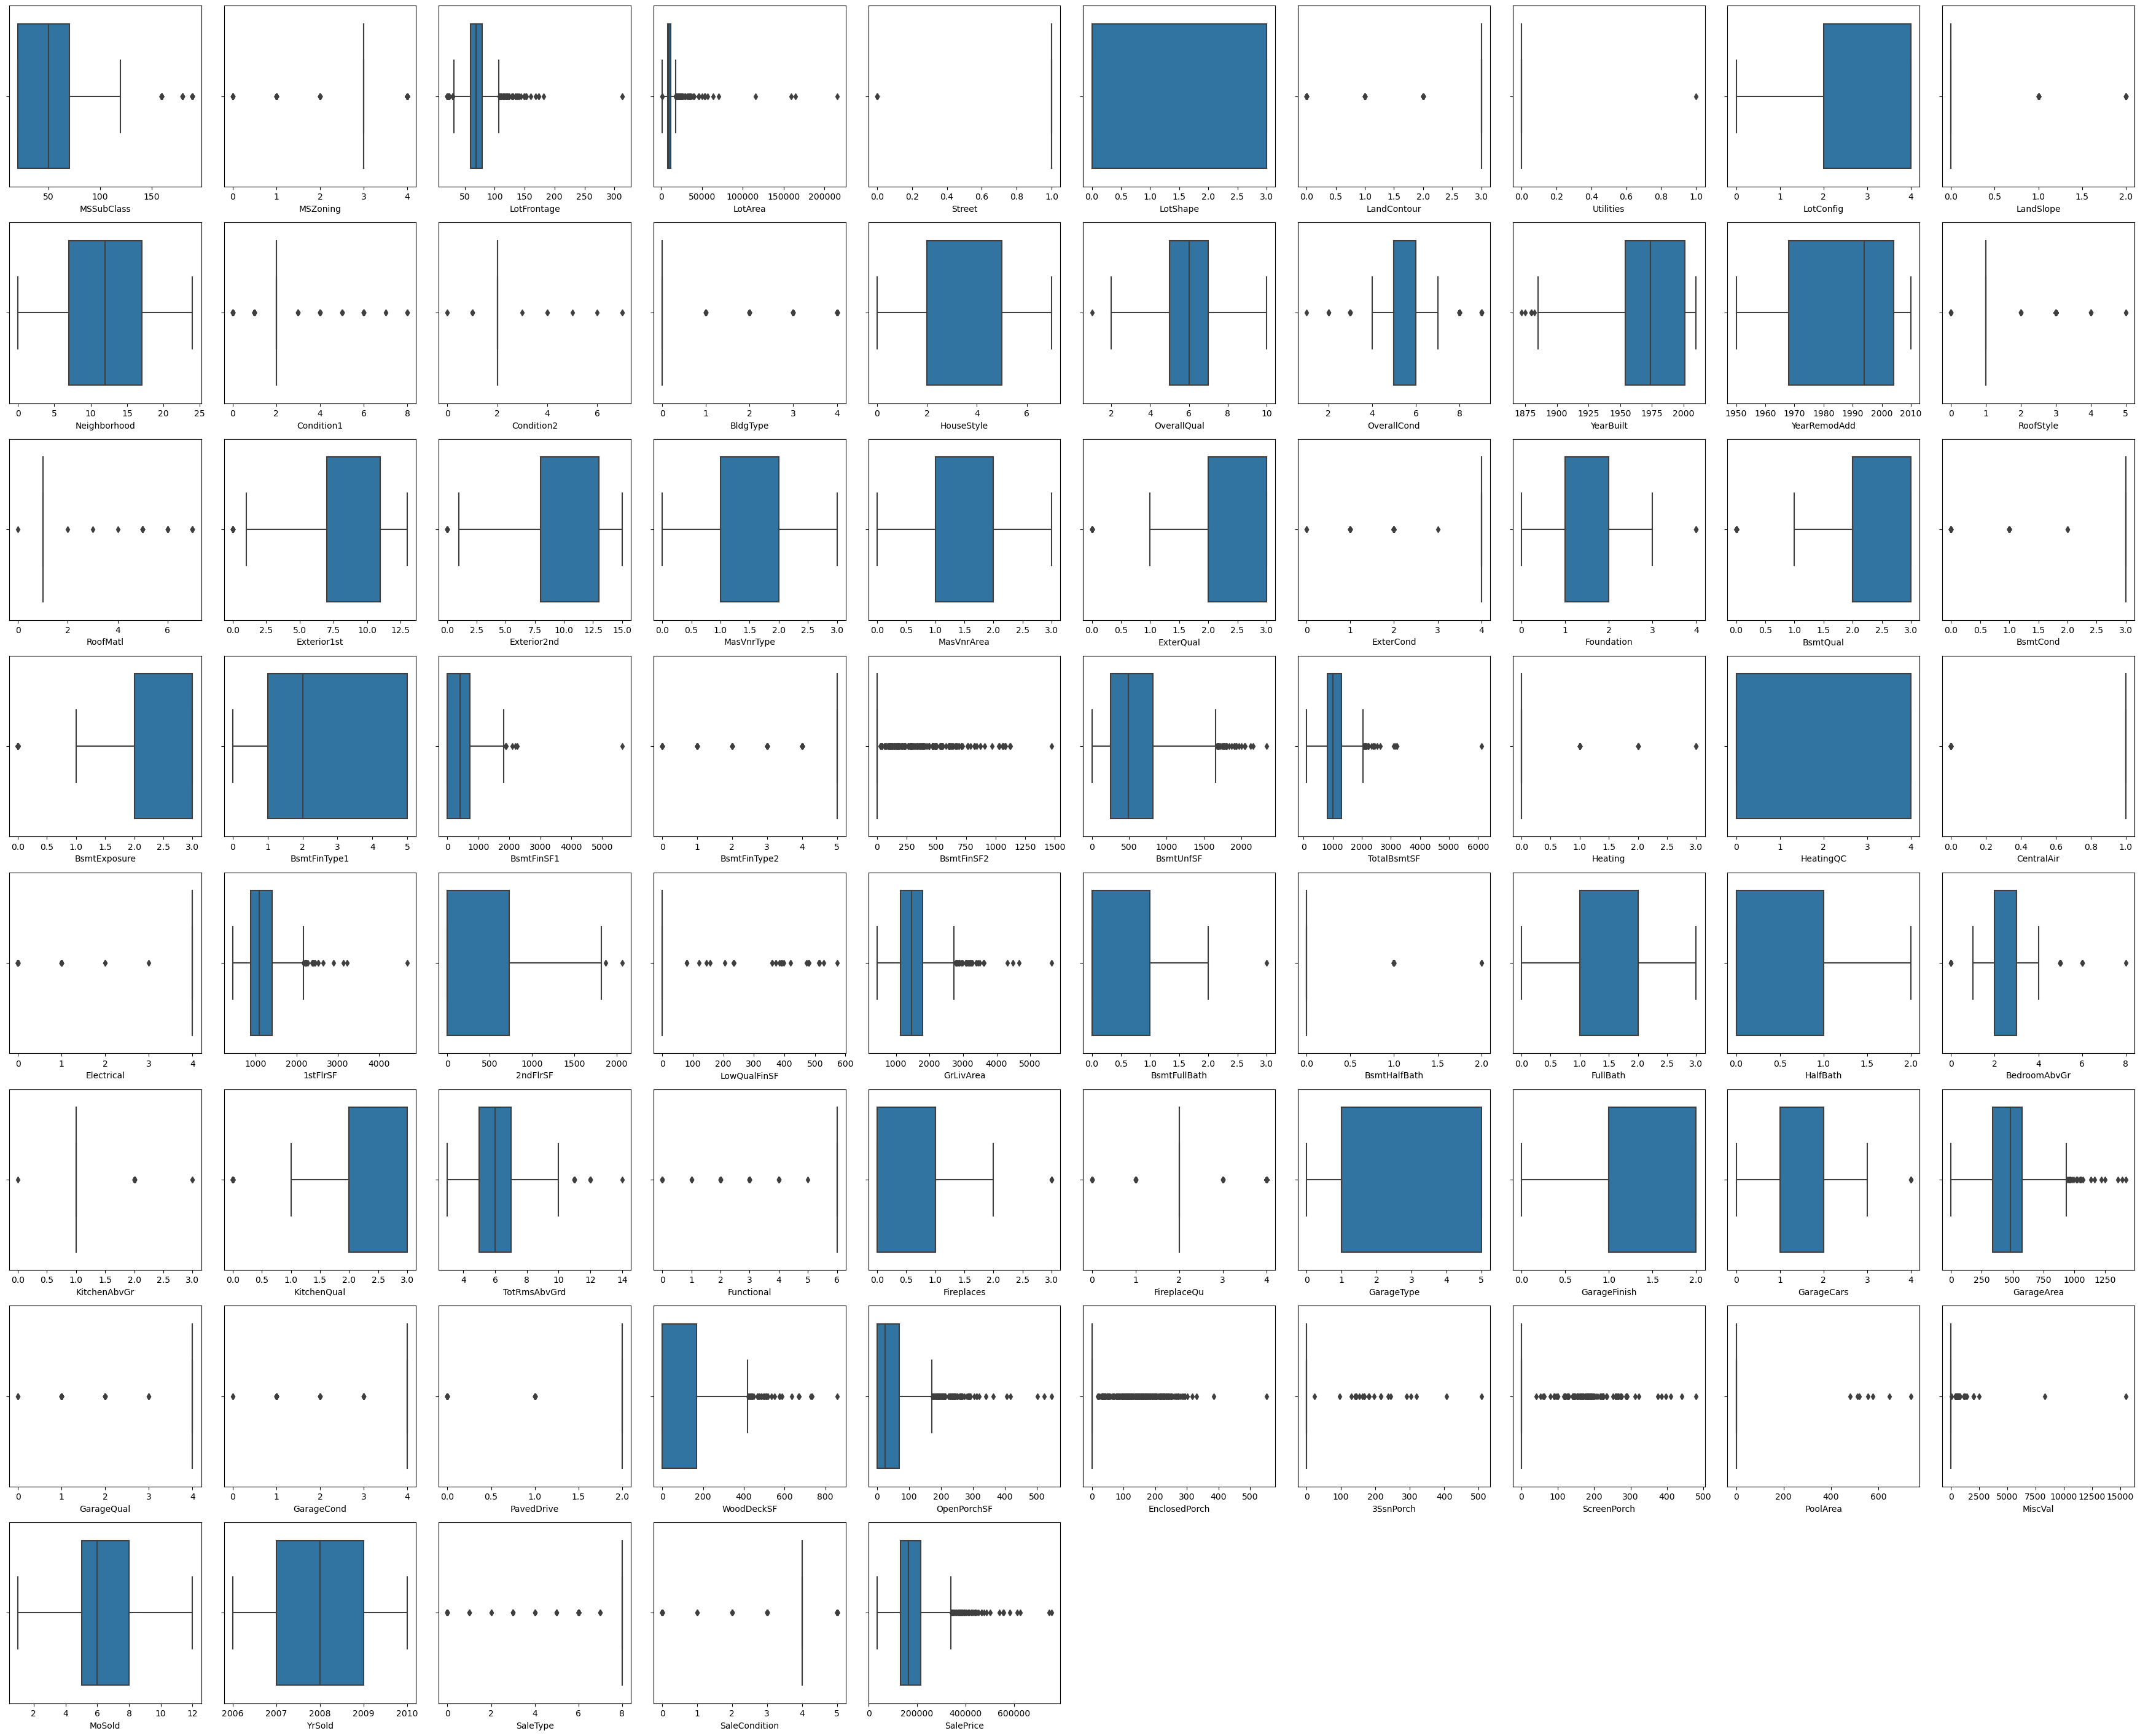

In [39]:
plt.figure(figsize=(35,35),facecolor='white')

plotnumber=1

for column in data:
        ax=plt.subplot(10,10,plotnumber)
        sns.boxplot(x = data[column])
        plotnumber+=1
plt.tight_layout() 

<AxesSubplot:>

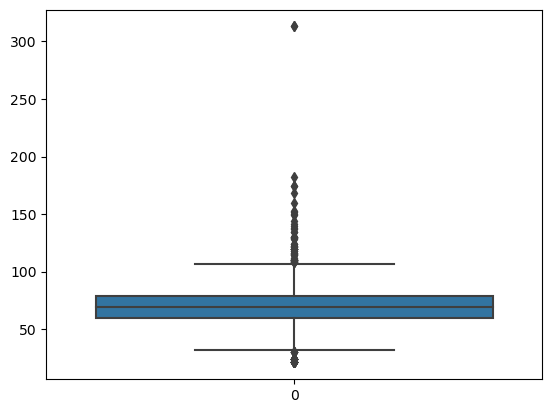

In [40]:
sns.boxplot(data.LotFrontage)

In [41]:
# Imputing outliers by IQR method
IQR=stats.iqr(data.LotFrontage,interpolation="midpoint")

#1st quartile 
Q1=data.LotFrontage.quantile(0.25)

#3rd quartile 
Q3=data.LotFrontage.quantile(0.75)


lower_limit=Q1-1.5*IQR #minimum limit


upper_limit=Q3+1.5*IQR #maximun limit

#replacing by median
data.loc[data["LotFrontage"]>upper_limit]=np.median(data.LotFrontage)

<AxesSubplot:>

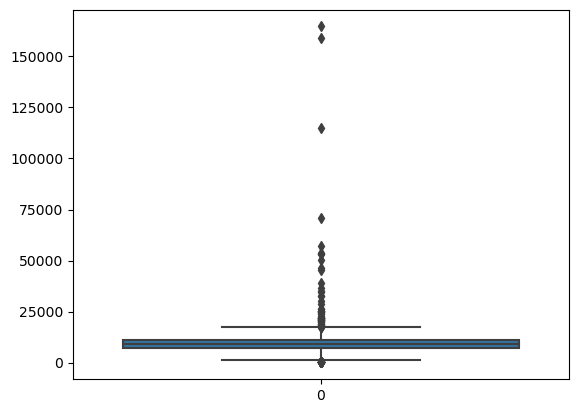

In [42]:

sns.boxplot(data.LotArea)

In [43]:
IQR=stats.iqr(data.LotArea,interpolation="midpoint")

Q1=data.LotArea.quantile(0.25)

Q3=data.LotArea.quantile(0.75)

lower_limit=Q1-1.5*IQR 

upper_limit=Q3+1.5*IQR 


data.loc[data["LotArea"]>upper_limit]=np.median(data.LotArea)

<AxesSubplot:>

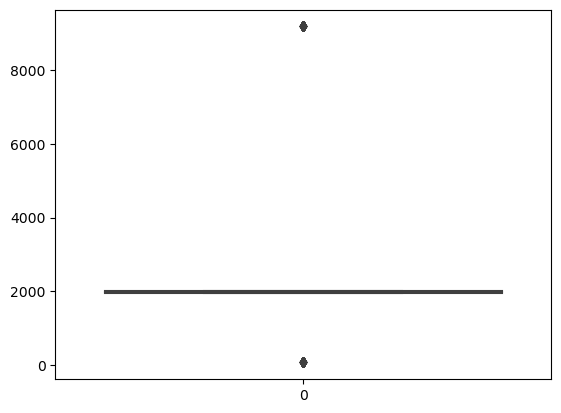

In [44]:
sns.boxplot(data.YearRemodAdd) # no outliers

<AxesSubplot:>

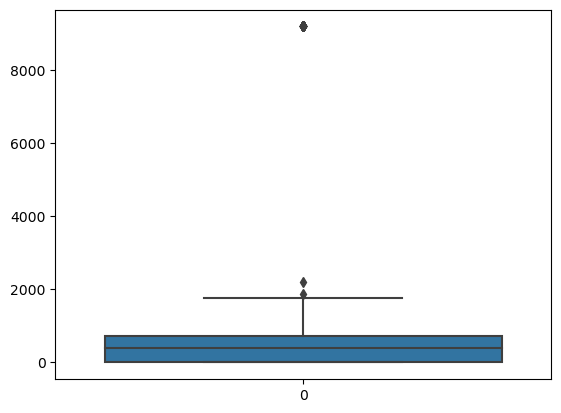

In [45]:
sns.boxplot(data.BsmtFinSF1)

In [46]:
IQR=stats.iqr(data.BsmtFinSF1,interpolation="midpoint")

Q1=data.BsmtFinSF1.quantile(0.25)

Q3=data.BsmtFinSF1.quantile(0.75)

lower_limit=Q1-1.5*IQR 

upper_limit=Q3+1.5*IQR 


data.loc[data["BsmtFinSF1"]>upper_limit]=np.median(data.BsmtFinSF1)

<AxesSubplot:>

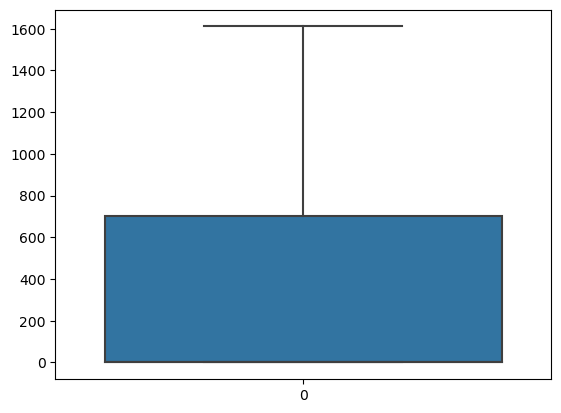

In [47]:
sns.boxplot(data["2ndFlrSF"]) # no outliers

<AxesSubplot:>

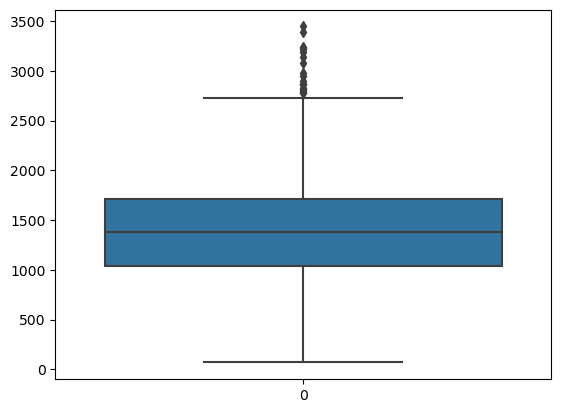

In [48]:
sns.boxplot(data.GrLivArea)

<AxesSubplot:>

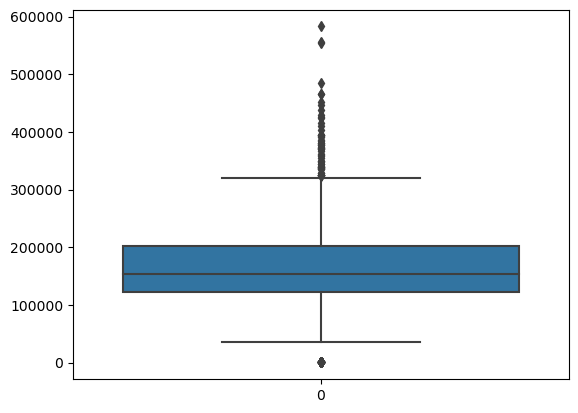

In [49]:
sns.boxplot(data.SalePrice)

In [50]:
data1=data[['MSSubClass','LotArea','YearBuilt','YearRemodAdd','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','TotRmsAbvGrd','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','MiscVal','MoSold','SalePrice']]

In [51]:
#checking correlation for continuous variables only

<AxesSubplot:>

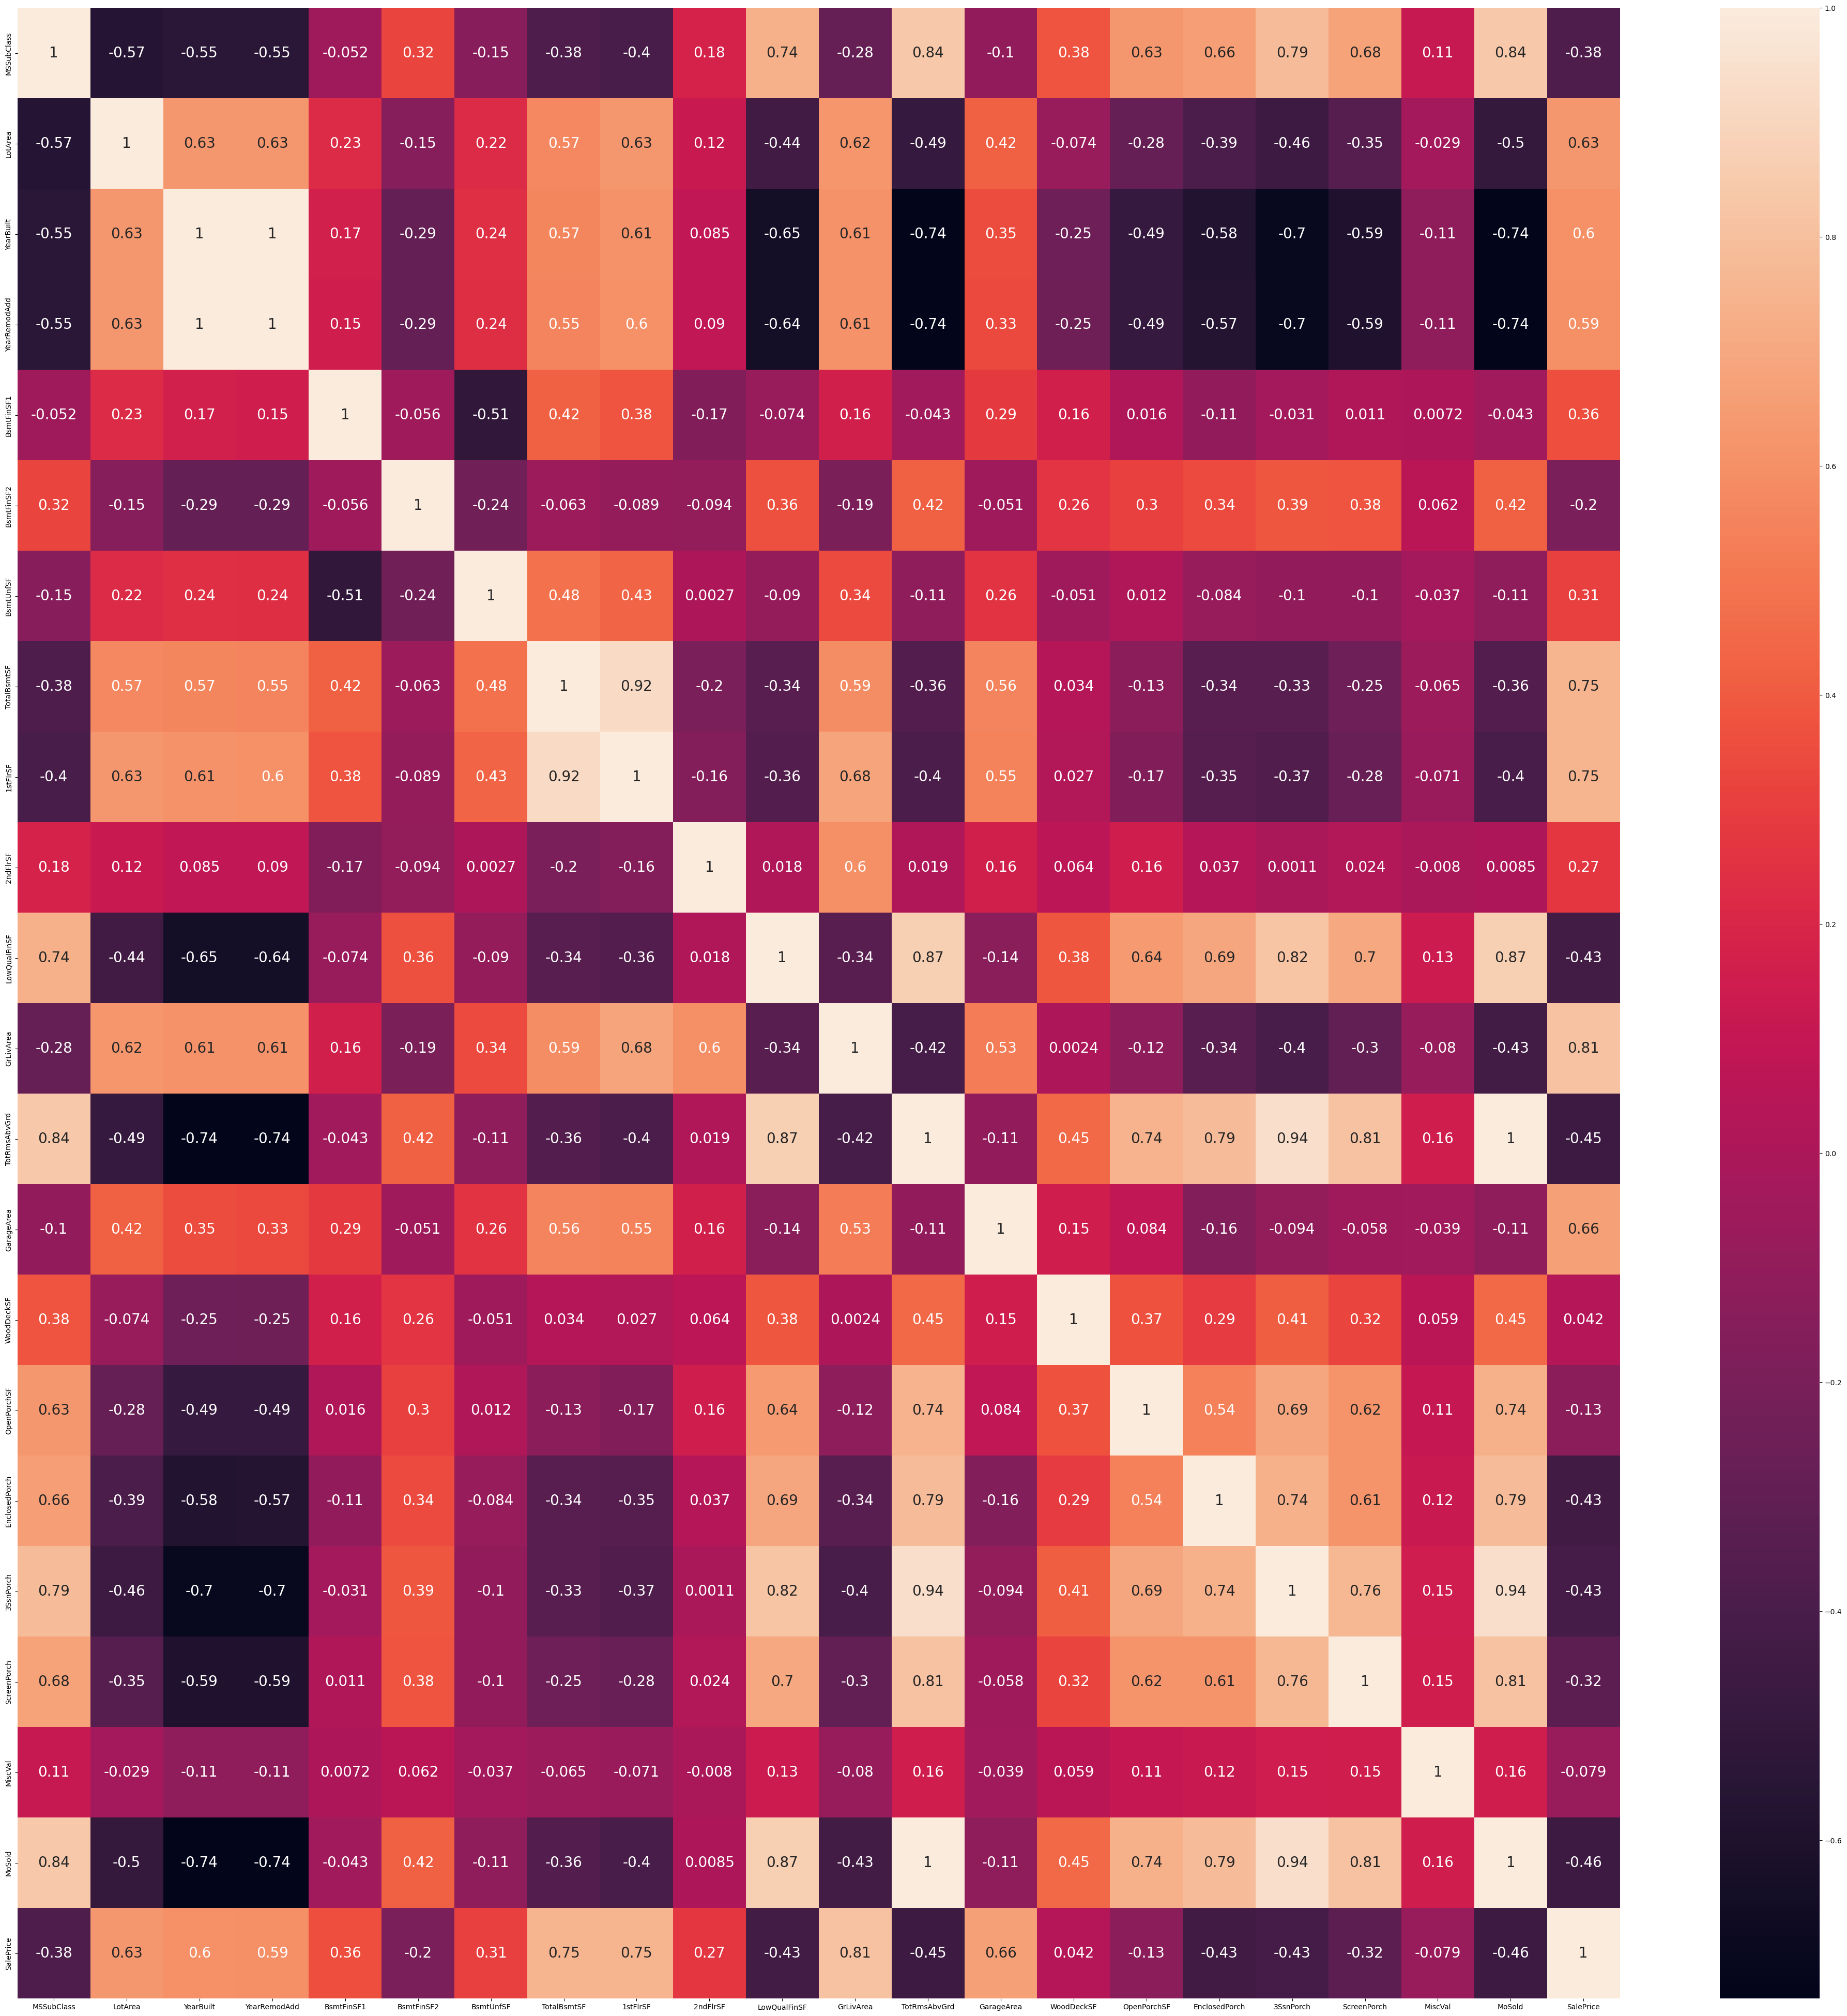

In [52]:
plt.figure(figsize=(50,50))
sns.heatmap(data1.corr(),annot=True,annot_kws={"size":20})

In [53]:
data.drop(["YearBuilt","YearRemodAdd","TotRmsAbvGrd","MoSold","TotalBsmtSF"],axis=1,inplace=True) #These columns are highly correlated so we can drop them

In [54]:
#creating the target variable

In [55]:
x=data.drop('SalePrice',axis=1)
y=data.SalePrice

In [56]:
# Train Test Split

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [59]:
# Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
lr=LinearRegression()

In [62]:
lr.fit(x_train,y_train)

LinearRegression()

In [63]:
y_pred=lr.predict(x_test)

In [64]:
from sklearn.metrics import r2_score,mean_squared_error

In [65]:
r2_regression=r2_score(y_test,y_pred)# for testing data

In [66]:
r2_regression

0.9120202499029479

In [67]:
mse=(mean_squared_error(y_test,y_pred))
mse

557025821.0365018

In [68]:
import math
rmse=math.sqrt(mean_squared_error(y_test,y_pred))
rmse

23601.39447228705

In [70]:
print(r2_regression,mse,rmse)

0.9120202499029479 557025821.0365018 23601.39447228705


In [71]:
# XGBoost

In [72]:
import xgboost

In [73]:
from xgboost import XGBRegressor

In [74]:
xg=XGBRegressor()

In [75]:
xg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [76]:
y_pred=xg.predict(x_test)

In [77]:
acc=r2_score(y_test,y_pred)# for testing data
acc

0.90424515820186

In [78]:
mse=(mean_squared_error(y_test,y_pred))
mse

606252226.3588067

In [79]:
rmse=math.sqrt(mean_squared_error(y_test,y_pred))
rmse

24622.189714946286

In [80]:
print(acc,mse,rmse)

0.90424515820186 606252226.3588067 24622.189714946286


In [81]:
# Random Forest

In [82]:
from sklearn.ensemble import RandomForestRegressor

In [83]:
rf=RandomForestRegressor()

In [84]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [85]:
y_pred=rf.predict(x_test)

In [86]:
a_c_c=r2_score(y_test,y_pred)# for testing data
a_c_c

0.9151168363668098

In [87]:
mse=(mean_squared_error(y_test,y_pred))
mse

537420416.2070901

In [88]:
rmse=math.sqrt(mean_squared_error(y_test,y_pred))
rmse

23182.32982698439

In [89]:
print(a_c_c,mse,rmse)

0.9151168363668098 537420416.2070901 23182.32982698439


In [90]:
#Decision Tree

In [110]:
from sklearn.tree import DecisionTreeRegressor#importing decision tree from sklearn.tree
dt=DecisionTreeRegressor()  
dt.fit(x_train,y_train)#training the model
y_pred=dt.predict(x_test)#prediction
y_pred

array([1.08000e+05, 1.27500e+05, 1.57900e+05, 1.38000e+05, 2.50000e+05,
       3.53110e+04, 1.74000e+05, 1.65150e+05, 8.10000e+04, 1.43000e+05,
       2.36000e+05, 1.86000e+05, 1.55000e+05, 1.19000e+05, 2.20000e+05,
       1.34500e+05, 1.62000e+05, 8.55000e+04, 1.35000e+05, 6.90000e+01,
       1.39400e+05, 1.13000e+05, 6.23830e+04, 1.20000e+05, 1.50000e+05,
       1.39000e+05, 1.34000e+05, 1.94000e+05, 1.94000e+05, 1.40000e+05,
       2.20000e+05, 1.16050e+05, 1.91000e+05, 6.90000e+01, 1.57000e+05,
       1.32500e+05, 2.19500e+05, 1.32500e+05, 1.39000e+05, 1.72500e+05,
       1.05500e+05, 2.97000e+05, 1.35000e+05, 2.30000e+05, 1.27000e+05,
       1.12000e+05, 1.97900e+05, 1.70000e+05, 1.47000e+05, 3.90000e+02,
       1.67000e+05, 1.51000e+05, 1.62500e+05, 1.67000e+05, 1.39400e+05,
       3.78500e+05, 2.22500e+05, 1.69500e+05, 1.44152e+05, 8.80000e+04,
       2.36500e+05, 1.16500e+05, 3.90000e+02, 1.63990e+05, 4.30000e+05,
       2.65900e+05, 1.65500e+05, 2.25000e+05, 2.75000e+05, 1.470

In [111]:
acc=r2_score(y_test,y_pred)
acc

0.7848600121030834

In [112]:
mse=(mean_squared_error(y_test,y_pred))
mse

1362114898.7564402

In [113]:
rmse=math.sqrt(mean_squared_error(y_test,y_pred))
rmse

36906.8408124624

In [114]:
print(acc,mse,rmse)

0.7848600121030834 1362114898.7564402 36906.8408124624


In [96]:
# Hyperparameter Tuning

In [97]:
# Grid Search CV

In [98]:
# Number of trees in random forest
n_estimators=[20,40,100,120]
# Number of features to consider at every split
max_features=[0.2,0.6,1.0]
# maximum number of levels in tree
max_depth=[2,8,None]
#Number of samples
max_samples=[0.5,0.75,1.0]


In [99]:
param_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'max_samples':max_samples
           }
print(param_grid)

{'n_estimators': [20, 40, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [100]:
rf=RandomForestRegressor()

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
rf_grid=GridSearchCV(estimator=rf,
                     param_grid=param_grid,
                     cv=5,
                     verbose=2,
                     n_jobs=-1)

In [103]:
rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 40, 100, 120]},
             verbose=2)

In [115]:
rf_grid.best_params_

{'max_depth': None,
 'max_features': 0.2,
 'max_samples': 0.75,
 'n_estimators': 40}

In [116]:
rf_grid.best_score_

0.9261005692286604

In [117]:
# Random Search CV

In [118]:
n_estimators=[20,60,100,120]
max_features=[0.2,0.6,1.0]
max_depth=[2,8,None]
bootstrap=[True,False]
# Minimum number of samples required
min_samples_split=[2,5]

# Miniimum no of samples required at each leaf node
min_samples_leaf=[1,2]

In [119]:
param_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'max_samples':max_samples,
            'bootstrap':bootstrap,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf
           }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0], 'bootstrap': [True, False], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}


In [120]:
from sklearn.model_selection import RandomizedSearchCV

In [121]:
rf_grid=RandomizedSearchCV(estimator=rf,
                          param_distributions=param_grid,
                          cv=5,
                          verbose=2,
                          n_jobs=-1)

In [122]:
rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 379, in fit
    raise ValueError(
ValueError: `max_sample` cannot be set if `bootstrap=False`. Either switch to `bootstrap=True` or set `max_sample=None`.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
C:\Progr

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 8, None],
                                        'max_features': [0.2, 0.6, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [20, 60, 100, 120]},
                   verbose=2)

In [123]:
rf_grid.best_params_

{'n_estimators': 120,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_samples': 1.0,
 'max_features': 0.2,
 'max_depth': None,
 'bootstrap': True}

In [124]:
rf_grid.best_score_

0.9236307766516516

In [126]:
dict={"Model":["Linear_Regression","XGBoost_Regressor","RandomForest_Regressor","DecisionTreeRegressor"],
     "MSE":[557025821.0365018,606252226.3588067,537420416.2070901,1362114898.7564402],
     "RMSE":[23601.39447228705,24622.189714946286,23182.32982698439,36906.8408124624],
     "r2_Score":[0.9120202499029479,0.90424515820186,0.9151168363668098,0.7848600121030834]}

In [127]:
scores=pd.DataFrame(dict)
scores

Model           MSE          RMSE  r2_Score
0       Linear_Regression  5.570258e+08  23601.394472  0.912020
1       XGBoost_Regressor  6.062522e+08  24622.189715  0.904245
2  RandomForest_Regressor  5.374204e+08  23182.329827  0.915117
3   DecisionTreeRegressor  1.362115e+09  36906.840812  0.784860